# import requre libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

###import  dataset into pandas dataframe 

In [2]:
data=pd.read_csv('/content/drive/MyDrive/simplilearn/python with data science /project4/Walmart_Store_sales.csv')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.shape

(6435, 8)

**which store has maximum sales**

In [6]:
sales_for_store=data.groupby('Store')['Weekly_Sales'].sum()

In [7]:
sales_for_store.head(5)

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [8]:
sales_for_store.max()

301397792.46000004

In [9]:
sales_for_store.idxmax()

20

In [10]:
sales_for_store[20]

301397792.46000004

**which state has maximum variation in statnderd deviation**

In [11]:
max_std=data.groupby('Store')['Weekly_Sales'].std()

In [12]:
max_std

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [13]:
max_std.idxmax()

14

In [14]:
max_std[14]

317569.9494755081

**Which store/s has good quarterly growth rate in Q3’2012**

In [15]:
data.Date=pd.to_datetime( data['Date'],infer_datetime_format='%d-%m-%y')

In [16]:
walmart_dataset_Q32012 = data[((data['Date']) >= pd.to_datetime('01-07-2012',format="%d-%m-%Y")) &
                                         ((data['Date']) <= pd.to_datetime('30-09-2012',format="%d-%m-%Y"))]
walmart_dataset_Q32012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-07-09,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684


In [17]:
walmart_dataset_Q32012.groupby(['Store'])['Weekly_Sales'].sum().max()

25652119.35

In [18]:
walmart_dataset_Q32012.groupby(['Store'])['Weekly_Sales'].sum().idxmax()

4

so in the index num 4 we have max Q3 that is 25652119.35

**4 Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together**

In [19]:
Christmas_sales=data.loc[(data["Date"]==pd.to_datetime("31-12-2010")) |
                        (data["Date"]==pd.to_datetime("30-12-2011")) | 
                        (data["Date"]==pd.to_datetime("28-12-2012")) | 
                        (data["Date"]==pd.to_datetime("27-12-2013"))]
Christmas_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163
242,2,2011-12-30,1874226.52,1,44.57,3.129,219.177306,7.441
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564
...,...,...,...,...,...,...,...,...
6105,43,2011-12-30,505405.85,1,41.83,3.129,211.074055,10.148
6196,44,2010-12-31,241937.11,1,26.79,2.868,127.087677,7.610
6248,44,2011-12-30,263917.85,1,31.53,3.119,130.071032,6.078
6339,45,2010-12-31,679156.20,1,29.67,3.179,182.571448,8.724


In [20]:
Thanksgiving=data.loc[(data["Date"]==pd.to_datetime("26-11-2010")) |
                                 (data["Date"]==pd.to_datetime("25-11-2011")) |
                                 (data["Date"]==pd.to_datetime("23-11-2012")) |
                                 (data["Date"]==pd.to_datetime("29-11-2013"))]
Thanksgiving

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866
185,2,2010-11-26,2658725.29,1,62.98,2.735,211.406287,8.163
237,2,2011-11-25,2614202.30,1,56.36,3.236,218.113027,7.441
328,3,2010-11-26,565567.84,1,68.71,2.735,215.061402,7.564
...,...,...,...,...,...,...,...,...
6100,43,2011-11-25,669965.22,1,55.70,3.236,210.088857,10.148
6191,44,2010-11-26,307646.50,1,28.22,2.830,126.669267,7.610
6243,44,2011-11-25,309129.01,1,38.89,3.445,129.836400,6.078
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


In [21]:
Labour_day=data.loc[(data["Date"]==pd.to_datetime("10-09-2010",format="%d-%m-%Y")) | 
                               (data["Date"]==pd.to_datetime("09-09-2011",format="%d-%m-%Y")) | 
                               (data["Date"]==pd.to_datetime("07-09-2012",format="%d-%m-%Y")) | 
                               (data["Date"]==pd.to_datetime("06-09-2013",format="%d-%m-%Y"))]
Labour_day

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962
226,2,2011-09-09,1748000.65,1,77.97,3.546,215.514829,7.852
369,3,2011-09-09,377347.49,1,81.72,3.546,219.213531,7.567
512,4,2011-09-09,2093139.01,1,73.34,3.554,129.368613,5.644
655,5,2011-09-09,321110.22,1,79.04,3.546,216.422682,6.529
798,6,2011-09-09,1483574.38,1,80.21,3.546,217.398030,6.925
941,7,2011-09-09,613135.23,1,45.61,3.566,194.638785,8.622
1084,8,2011-09-09,848358.09,1,69.01,3.546,219.260435,6.425
1227,9,2011-09-09,528784.86,1,75.65,3.546,219.445767,6.404
1370,10,2011-09-09,1670579.82,1,89.06,3.771,129.368613,8.257


In [22]:
Super_Bowl=data.loc[(data["Date"]==pd.to_datetime("12-02-2010",format="%d-%m-%Y")) |
                               (data["Date"]==pd.to_datetime("11-02-2011",format="%d-%m-%Y")) |
                               (data["Date"]==pd.to_datetime("10-02-2012",format="%d-%m-%Y")) |
                               (data["Date"]==pd.to_datetime("08-02-2013",format="%d-%m-%Y"))]
Super_Bowl.shape

(0, 8)

In [23]:
holiday_sale=data.loc[data['Holiday_Flag']==1]

In [24]:
holiday_sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424


In [25]:
non_holiday=data.loc[data['Holiday_Flag']==0]
non_holiday.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106


###Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together



In [26]:
A=non_holiday.Weekly_Sales.mean()

In [27]:

non_holidayweek_sale_mean=non_holiday.groupby("Date").agg({"Weekly_Sales":'mean'}).reset_index()
non_holidayweek_sale_mean

,Date,Weekly_Sales
0,2010-01-10,9.386639e+05
1,2010-02-04,1.120530e+06
2,2010-02-07,1.087055e+06
3,2010-02-19,1.072822e+06
4,2010-02-26,9.770794e+05
...,...,...
128,2012-10-08,1.053410e+06
129,2012-10-19,1.002720e+06
130,2012-10-26,1.012091e+06
131,2012-11-05,1.042797e+06


In [28]:
holiday_sale_total=holiday_sale.groupby('Date').agg({"Weekly_Sales":'mean'}).reset_index()

In [29]:
holiday_sale_total

,Date,Weekly_Sales
0,2010-10-09,1.014098e+06
1,2010-11-26,1.462689e+06
2,2010-12-02,1.074148e+06
3,2010-12-31,8.985004e+05
4,2011-09-09,1.039183e+06
5,2011-11-02,1.051915e+06
6,2011-11-25,1.479858e+06
7,2011-12-30,1.023166e+06
8,2012-07-09,1.074001e+06
9,2012-10-02,1.111320e+06


In [30]:

for X in holiday_sale_total.itertuples():
    for X1 in non_holidayweek_sale_mean.itertuples():
        if X.Weekly_Sales > X1.Weekly_Sales:
            print("On Date {} , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- {}"
                  .format(X.Date,X.Weekly_Sales))
            break;

On Date 2010-10-09 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 1014097.7297777778
On Date 2010-11-26 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 1462688.9608888887
On Date 2010-12-02 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 1074148.3917777783
On Date 2010-12-31 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 898500.4222222222
On Date 2011-09-09 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 1039182.8339999999
On Date 2011-11-02 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 1051915.3953333339
On Date 2011-11-25 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 1479857.8946666664
On Date 2011-12-30 00:00:00 , Holiday sales are greater than Non_Holiday_mean_sales and the sales:- 1023165.800888889
On Date 2012-07-09 00:00:00 , Holiday sales are gr

###Provide a monthly and semester view of sales in units and give insights

In [31]:
data["Year"]= pd.DatetimeIndex(data['Date']).year
data["Month"]= pd.DatetimeIndex(data['Date']).month

In [32]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


 **month wise analisis**

In [33]:
data_2010=data.loc[data['Year']==2010]
data_2011=data.loc[data['Year']==2011]
data_2012=data.loc[data['Year']==2012]

Text(0.5, 1.0, 'Monthly view of sales in 2010')

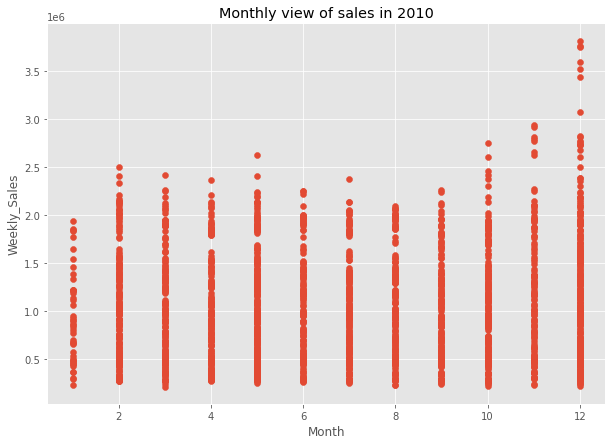

In [34]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7) )
plt.scatter(data_2010["Month"],data_2010["Weekly_Sales"] )
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Monthly view of sales in 2010")

Text(0.5, 1.0, 'Monthly view of sales in 2010')

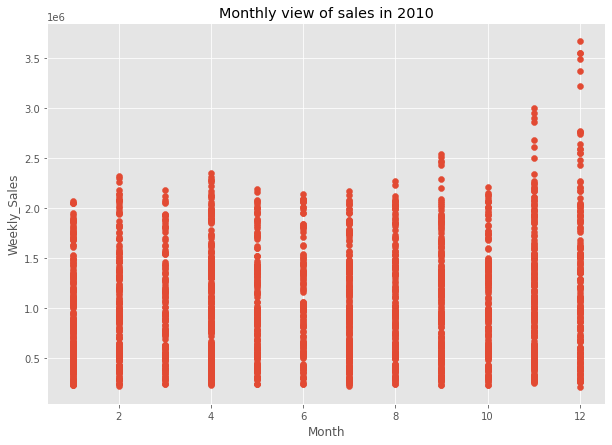

In [35]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.scatter(data_2011["Month"],data_2011["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Monthly view of sales in 2010")

Text(0.5, 1.0, 'Monthly view of sales in 2010')

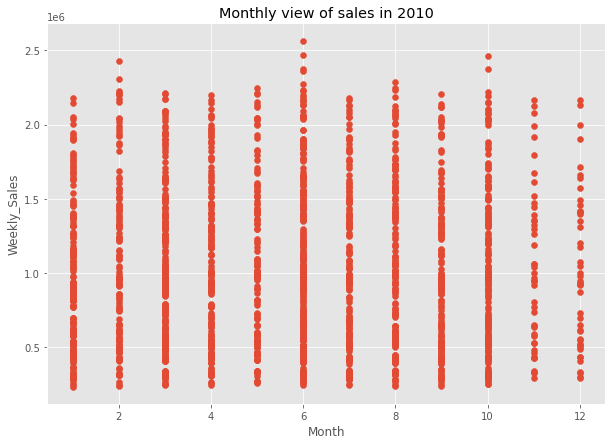

In [36]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.scatter(data_2012["Month"],data_2012["Weekly_Sales"])
plt.xlabel("Month")
plt.ylabel("Weekly_Sales")
plt.title("Monthly view of sales in 2010")

**semester wise analisis**

In [37]:
semester_sales=[]
semester_sales.append(data_2010.loc[data_2010["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(data_2010.loc[data_2010["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(data_2011.loc[data_2011["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(data_2011.loc[data_2011["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(data_2012.loc[data_2012["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(data_2012.loc[data_2012["Month"]>6,["Weekly_Sales"]].sum())

In [38]:
semester_sales

[Weekly_Sales    1.026913e+09
 dtype: float64, Weekly_Sales    1.261973e+09
 dtype: float64, Weekly_Sales    1.138060e+09
 dtype: float64, Weekly_Sales    1.310140e+09
 dtype: float64, Weekly_Sales    1.163004e+09
 dtype: float64, Weekly_Sales    8.371288e+08
 dtype: float64]

In [39]:
sem_name=["1st_sem_2010",'2nd_sem_2010','1sem_2011','2ndsem_2011','1sem_2012','2ndsem_2012']

Text(0.5, 1.0, 'Semester view of sales')

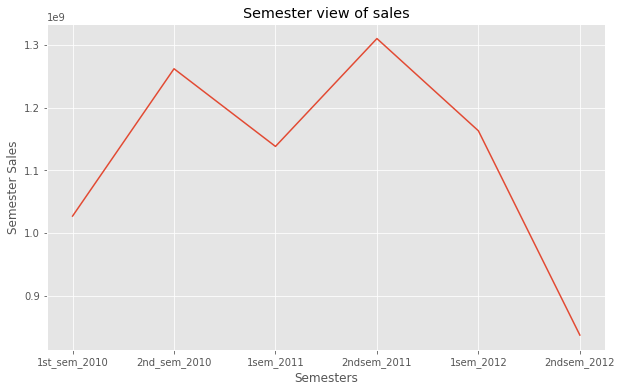

In [40]:

plt.figure(figsize=(10,6))
plt.plot(sem_name,semester_sales)
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

In [41]:
#Restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order)

In [42]:
x_object1=data[data['Store'] == 1][['Store','Date']]
x_object1

,Store,Date
0,1,2010-05-02
1,1,2010-12-02
2,1,2010-02-19
3,1,2010-02-26
4,1,2010-05-03
...,...,...
138,1,2012-09-28
139,1,2012-05-10
140,1,2012-12-10
141,1,2012-10-19


# Statistical Model

### For Store 1 – Build  prediction models to forecast demand

### Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [43]:
X_feature=data.drop(["Weekly_Sales","Holiday_Flag","Date","Year","Month","Unemployment"],axis=1)
X_feature=X_feature[X_feature["Store"]==1]
Y_target=data[data['Store']==1]["Weekly_Sales"]
print (X_feature)
print (Y_target)

     Store  Temperature  Fuel_Price         CPI
0        1        42.31       2.572  211.096358
1        1        38.51       2.548  211.242170
2        1        39.93       2.514  211.289143
3        1        46.63       2.561  211.319643
4        1        46.50       2.625  211.350143
..     ...          ...         ...         ...
138      1        76.08       3.666  222.981658
139      1        68.55       3.617  223.181477
140      1        62.99       3.601  223.381296
141      1        67.97       3.594  223.425723
142      1        69.16       3.506  223.444251

[143 rows x 4 columns]
0      1643690.90
1      1641957.44
2      1611968.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64


In [44]:
# Splitting the data into training & testing datasets(75:25)
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_feature,Y_target,test_size=0.25,random_state=0 )

In [45]:
print (X_train.shape)
print (Y_train.shape)

(107, 4)
(107,)


In [46]:
print (X_test.shape)
print (Y_test.shape)

(36, 4)
(36,)


In [47]:
#import linear model
from sklearn.linear_model import LinearRegression
#creating instance of the class also called estimator
linreg = LinearRegression(normalize=True,n_jobs=-1)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
#fit data into estimator
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [50]:
print(format(linreg.score(X_test,Y_test)*100))

10.418395241957368


In [51]:
linreg.score(X_train,Y_train)*100

7.381662111167087

In [52]:

print(np.sqrt(mean_squared_error(Y_train,linreg.predict(X_train))))

149008.62587628452


In [53]:

print(np.sqrt(mean_squared_error(Y_test,linreg.predict(X_test))))

141607.41112065336


In [54]:
print(linreg.intercept_)
print(linreg.coef_)

-21211.439679863397
[    0.         -2205.21336452 -7800.78291088  8052.94206211]


In [55]:
import seaborn as sns

In [59]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month'],
      dtype='object')

In [61]:
col=['Weekly_Sales','Fuel_Price', 'CPI', 'Unemployment']

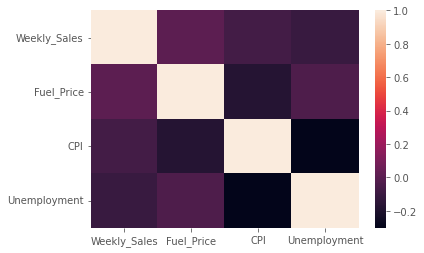

In [66]:
ax=sns.heatmap(data[col].corr())

here we can say fuel price has positive impect  on sales and second cpi is also the positive impect on sale but unemployment feture has a negative impect on weekly_sales

##Change dates into days by creating new variable.

In [68]:
data['day']=pd.to_datetime(data['Date']).dt.day_name()

In [69]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Friday


In [ ]:
**********************************************end****************************by anurag bisen 